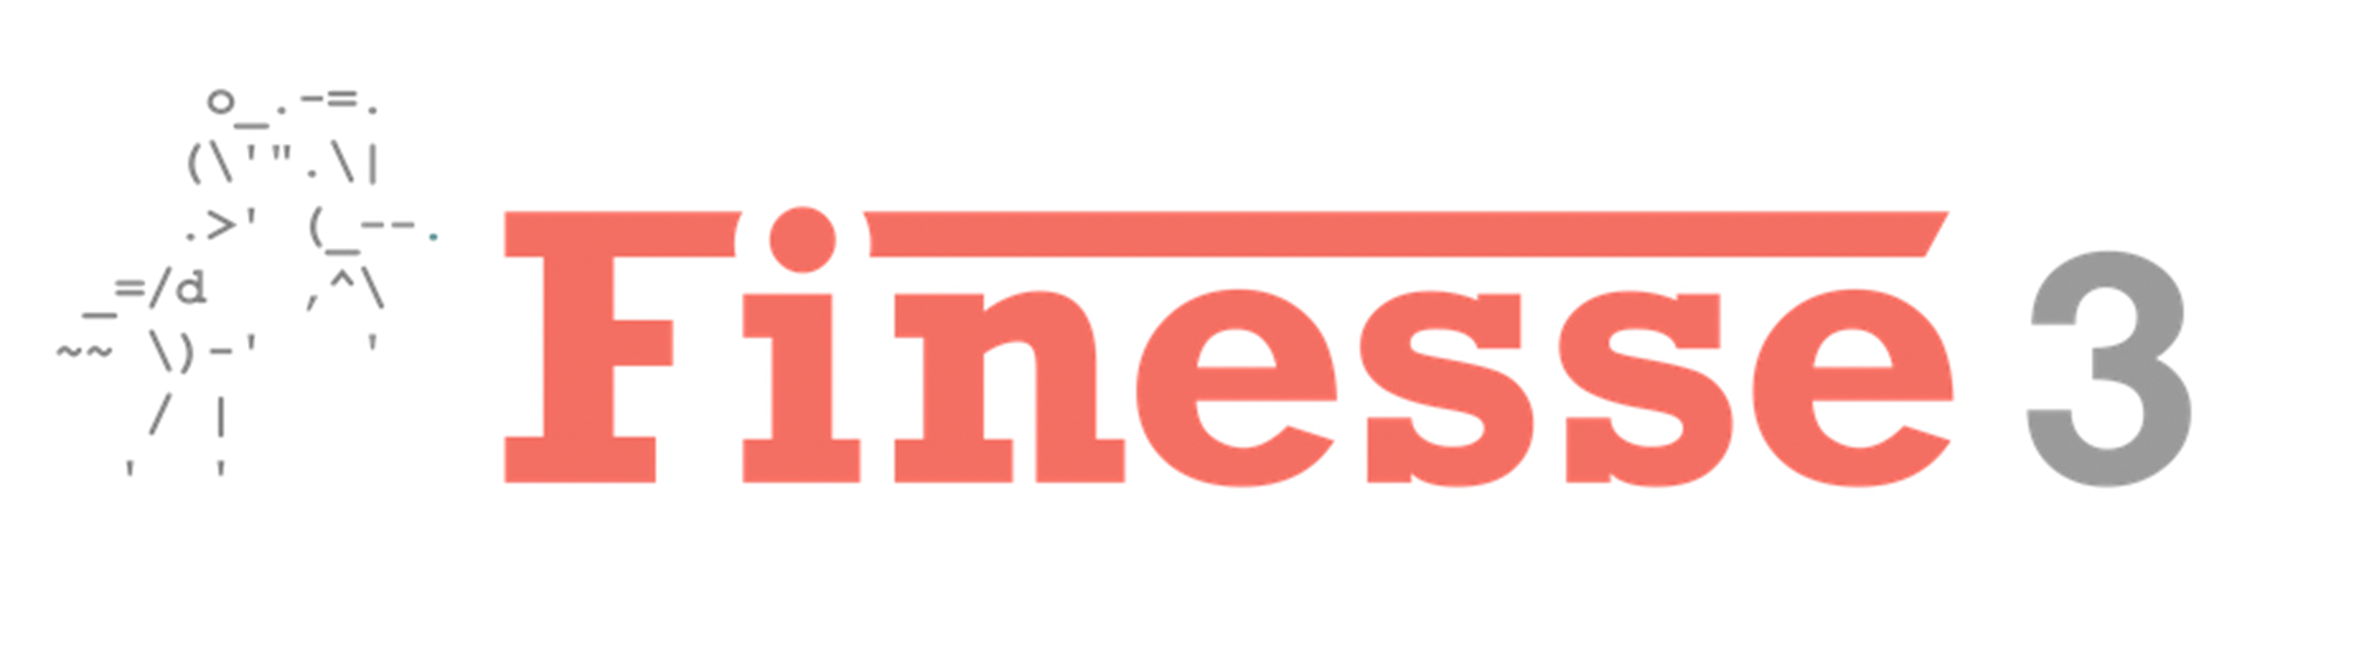

In [50]:
### Usual imports
import numpy as np
import matplotlib.pyplot as plt

### Finesse imports
import finesse
import finesse.components as fc
import finesse.detectors as fd
import finesse.analysis as fa

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from cycler import cycler
lines = ['--', '-.', '-', ':']
mpl.rcParams['axes.prop_cycle'] = cycler(color=['#000E54','#F76900','#FF8E00']) #syracuse colors, not actually being used
rc('font', **{'family': 'monospace'})

In [52]:
def fp_ifo_mat(phi,r1,t1,r2,t2):
    i = 1j                                               #define unit imaginary num.
    ifo_mat = np.array([[1,0,0,0,0,0,0],                 #define 7x7 interferometer matrix
                        [i*(-t1),1,0,0,-r1,0,0],
                        [0,-np.exp(-i*phi),1,0,0,0,0],
                        [0,0,-r2,1,0,0,0],
                        [0,0,0,-np.exp(-i*phi),1,0,0],
                        [-r1,0,0,0,i*(-t1),1,0],
                        [0,0,i*(-t2),0,0,0,1]])
    return ifo_mat                                       #return ifo matrix

In [53]:
ifo_mat = fp_ifo_mat(0,np.sqrt(0.9),np.sqrt(0.1),np.sqrt(0.9),np.sqrt(0.1))
inv_ifo_mat = np.linalg.inv(ifo_mat)

In [54]:
ifo_mat.shape

(7, 7)

In [55]:
src_mat = np.array([[1],
                    [0],
                    [0],
                    [0],
                    [0],
                    [0],
                    [0]])

In [56]:
src_mat.shape

(7, 1)

In [57]:
inv_ifo_mat = np.linalg.inv(ifo_mat)
sol = np.matmul(inv_ifo_mat,src_mat)

In [58]:
sol

array([[ 1.00000000e+00+0.j        ],
       [ 0.00000000e+00+3.16227766j],
       [ 0.00000000e+00+3.16227766j],
       [ 0.00000000e+00+3.j        ],
       [ 0.00000000e+00+3.j        ],
       [ 5.85138911e-16+0.j        ],
       [-1.00000000e+00+0.j        ]])

In [69]:
solmat = [] #define list to hold solution object

phi = np.arange(-180,181,1) * (np.pi/180) #tuning to sweep over (in radians!)
for p in phi:
    ifo_mat = fp_ifo_mat(p,np.sqrt(0.9),np.sqrt(0.1),np.sqrt(0.9),np.sqrt(0.1)) #define interferometer using ifo matrix
    inv_ifo_mat = np.linalg.inv(ifo_mat)                                        #invert ifo matrix
    sol = np.matmul(inv_ifo_mat,src_mat)                                        #multiply inverted ifo matrix with source matrix
    solmat.append(np.abs(sol)**2)                                               #append solution vector to solution list
    
transm = [sol[6] for sol in solmat]                                             #access transmitted power
refl = [sol[5] for sol in solmat]                                               #access reflected power
circ = [sol[3] for sol in solmat]                                               #access circulating power

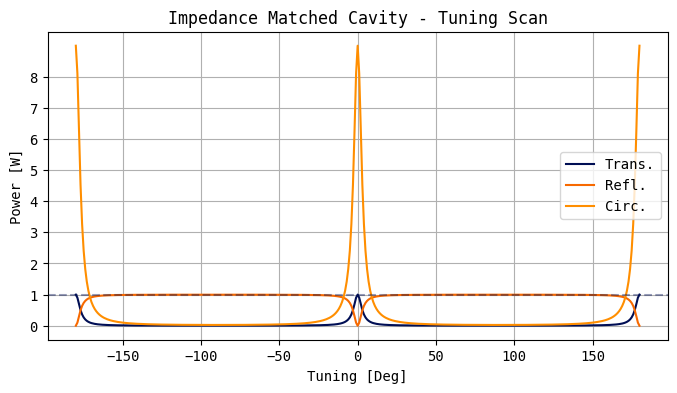

In [87]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(phi*(180/np.pi),transm,label='Trans.')
ax.plot(phi*(180/np.pi),refl,label='Refl.')
ax.plot(phi*(180/np.pi),circ,label='Circ.')
#ax.set_ylim([0.00001,9])

ax.legend()
ax.grid(which='both')
ax.set_title('Impedance Matched Cavity - Tuning Scan')
ax.set_xlabel('Tuning [Deg]')
ax.set_ylabel('Power [W]')
ax.axhline(1,0,1,linestyle='dashed',alpha=0.4)

ax.set_yticks(np.arange(0, 9, 1));